In [ ]:
!pip install rdkit >& dev_null

### Libraries

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

import IPython
from IPython.display import display, Image
from PIL import Image

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

### Importing first dataset

In [23]:
df = pd.read_csv("dataset_single.csv")
df.head()

,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


### Analysing dataset

In [30]:
df.shape

(4999, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      4999 non-null   int64 
 1   mol_id  4999 non-null   object
 2   smiles  4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [25]:
df.isnull().sum()

,0
P1,0
mol_id,0
smiles,0


In [26]:
print("Unique SMILES : ", df['smiles'].nunique())

Unique SMILES :  4999


In [44]:
print(df['P1'].value_counts())

P1
1    4108
0     891
Name: count, dtype: int64


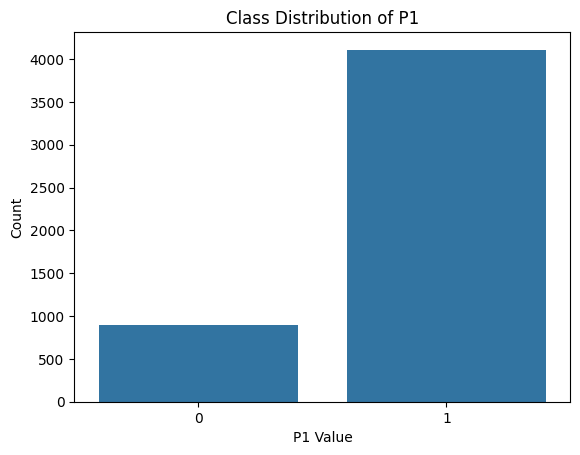

In [28]:
sns.countplot(x='P1', data=df)
plt.title('Class Distribution of P1')
plt.xlabel('P1 Value')
plt.ylabel('Count')
plt.show()

### We can see that there is a heavy imbalance for the P1 column as 4108 rows for the value 1 and 891 rows for the value 0. So we try to make it balanced, in this case i tried to undersample the values 1 to 2500 and the values 0 to 2000.

Trying to balance the dataset

In [36]:
from sklearn.utils import resample

# Separate majority and minority
df_0 = df[df['P1'] == 0]
df_1 = df[df['P1'] == 1]

In [37]:

#Undersample majority class to 2500
df_1_downsampled = resample(df_1,
                            replace=False,
                            n_samples=2500,
                            random_state=42)

# Oversample minority class to 2000
df_0_upsampled = resample(df_0,
                          replace=True,
                          n_samples=2000,
                          random_state=42)

# Combine
df_balanced = pd.concat([df_1_downsampled, df_0_upsampled])

In [40]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

P1
1    2500
0    2000
Name: count, dtype: int64


In [45]:
print(df_balanced['P1'].value_counts())

P1
1    2500
0    2000
Name: count, dtype: int64


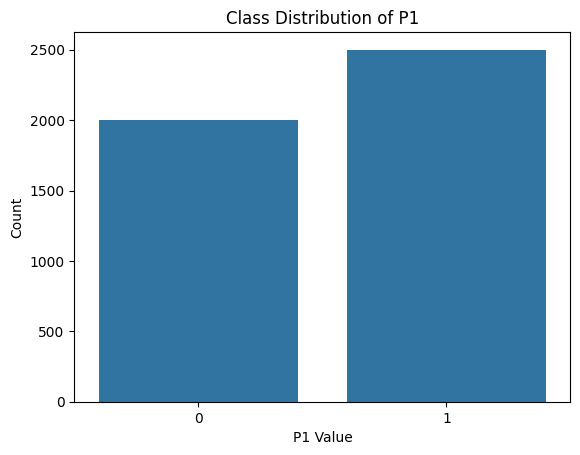

In [39]:
sns.countplot(x='P1', data=df_balanced)
plt.title('Class Distribution of P1')
plt.xlabel('P1 Value')
plt.ylabel('Count')
plt.show()

In [43]:
print("Unique SMILES : ", df_balanced['smiles'].nunique())

Unique SMILES :  3285


In [41]:
df_balanced.to_csv('balanced_dataset_single.csv', index=False)